# Importing Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

# Reading the cat image from the images folder

In [2]:
img=cv2.imread('images/11.jpg')
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #converting from BGR to RGB
original=img_rgb.copy()

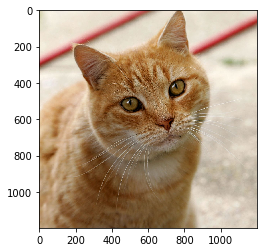

In [3]:
plt.imshow(img_rgb) #displaying the image

# Corrupting 4% of the image

In [4]:
img_rgb.shape

(1199, 1200, 3)

In [5]:
resize_img=img_rgb.reshape(img_rgb.shape[0]*img_rgb.shape[1],3) #reshape to find 4% of the pixels

In [6]:
percent=4*len(resize_img)/100 #4% pixels

In [7]:
for i in range(int(percent)):
    n=random.randint(0,len(resize_img))#choosing random point in the image
    r=random.randint(0,255)
    g=random.randint(0,255)# generating random pixel
    b=random.randint(0,255)
    resize_img[n,0]=r
    resize_img[n,1]=g
    resize_img[n,2]=b

In [8]:
noise_img=resize_img.reshape(1199,1200,3) #reshaping back to original form

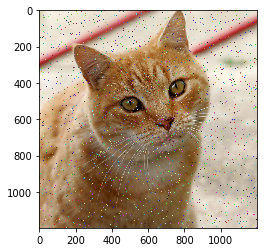

In [9]:
plt.imshow(noise_img)# displaying noisy image

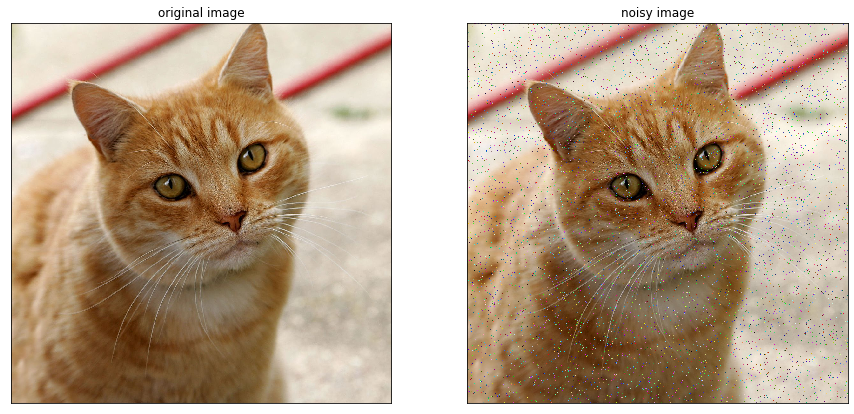

In [10]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title('original image')
plt.xticks([])
plt.yticks([])
plt.imshow(original)
plt.subplot(1,2,2)
plt.title('noisy image')
plt.xticks([])
plt.yticks([])
plt.imshow(noise_img)

In [11]:
cv2.imwrite('noise.jpg',noise_img)

True

# Denoising Image

In [95]:
img2=cv2.imread('noise.jpg')
noise=img2.copy()

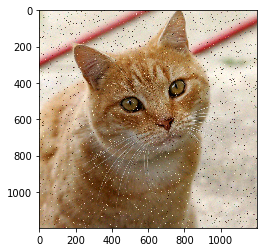

In [96]:
plt.imshow(img2)

# Using MEAN

In [97]:
z=0
for i in range(len(img2)-2):
    for j in range(len(img2[0])-2):
        k=img2[i:i+3,j:j+3,:].astype(float)
        curr=img2[i,j,:].astype(float)
        x=k-curr
        if sum(sum(abs(x)/8))[0] >35 or sum(sum(abs(x)/8))[1] >35 or sum(sum(abs(x)/8))[2] >35:
            z=z+1
            img2[i,j,:]=np.mean(np.mean(k, axis = 0),axis=0)
z#no of noisy pixel detected

73860

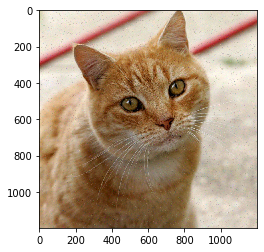

In [98]:
plt.imshow(img2)

# Showing oringinal noisy and denoise images

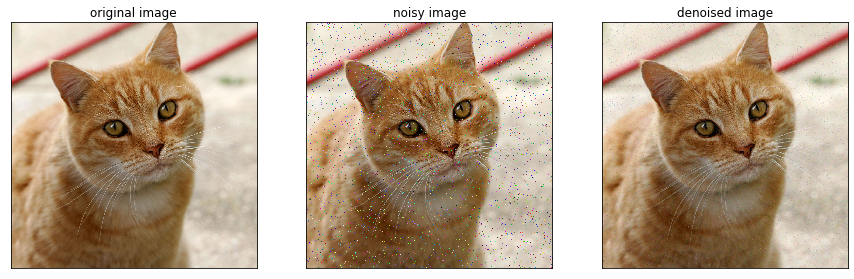

In [99]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title('original image')
plt.xticks([])
plt.yticks([])
plt.imshow(original)
plt.subplot(1,3,2)
plt.title('noisy image')
plt.xticks([])
plt.yticks([])
plt.imshow(noise_img)
plt.subplot(1,3,3)
plt.title('denoised image')
plt.xticks([])
plt.yticks([])
plt.imshow(img2)

# Using Median

In [100]:
img2=cv2.imread('noise.jpg')
noise=img2.copy()

In [101]:
z=0
for i in range(len(img2)-2):
    for j in range(len(img2[0])-2):
        k=img2[i:i+3,j:j+3,:].astype(float)
        curr=img2[i,j,:].astype(float)
        x=k-curr
        if sum(sum(abs(x)/8))[0] >35 or sum(sum(abs(x)/8))[1] >35 or sum(sum(abs(x)/8))[2] >35:
            z=z+1
            img2[i,j,:]=np.median(np.median(k, axis = 0),axis=0)
z#no of noisy pixel detected

73860

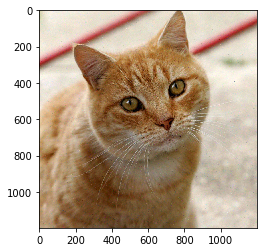

In [102]:
plt.imshow(img2)

# Showing oringinal noisy and denoise images

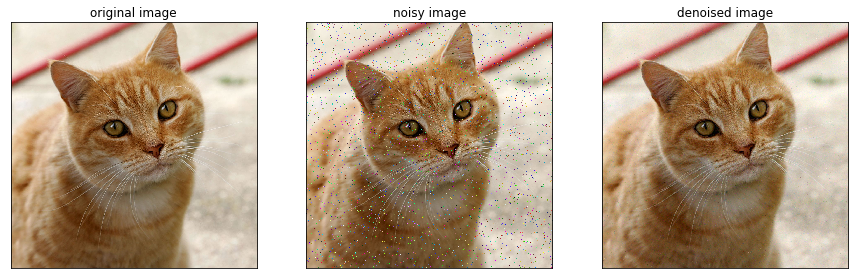

In [103]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title('original image')
plt.xticks([])
plt.yticks([])
plt.imshow(original)
plt.subplot(1,3,2)
plt.title('noisy image')
plt.xticks([])
plt.yticks([])
plt.imshow(noise_img)
plt.subplot(1,3,3)
plt.title('denoised image')
plt.xticks([])
plt.yticks([])
plt.imshow(img2)